In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sns
import random as random
from datetime import datetime,timedelta

In [2]:
import matplotlib.pyplot as plt

In [3]:
def generate_sales_data(num_order=100):
    start_date = datetime(2025,1,1)
    end_date = datetime(2025,12,31)
    data = {
        'order_id': range(1,num_order+1),
        'customer_id':[random.randint(100,200) for _ in range(num_order)],
        'product':[random.choice(['Book','Laptop','Pen','Bag']) for _ in range(num_order)],
        'quantity':[random.randint(1,10) for _ in range(num_order)],
        'price':[random.randint(100,1000) for _ in range(num_order)],
        'date': [(start_date + timedelta(days=random.randint(0, (end_date-start_date).days))).strftime("%Y-%m-%d")
                 for _ in range(num_order)]

    }
    return pd.DataFrame(data)


df = generate_sales_data(num_order=5000)
print(df.head())

   order_id  customer_id product  quantity  price        date
0         1          194  Laptop         3    172  2025-02-04
1         2          156    Book         2    802  2025-10-23
2         3          123  Laptop         9    195  2025-01-08
3         4          168     Bag         3    616  2025-04-21
4         5          169  Laptop         2    674  2025-05-08


In [4]:
df['Total_Sales'] = df['quantity'] * df['price']

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
avg_price_cat = df.groupby('product')['price'].mean().sort_values(ascending=False)
print(avg_price_cat)

product
Laptop    555.933225
Pen       554.208791
Bag       554.087449
Book      550.438638
Name: price, dtype: float64


In [7]:
weekly_sales = df.set_index('date')['Total_Sales'].resample('W').sum()

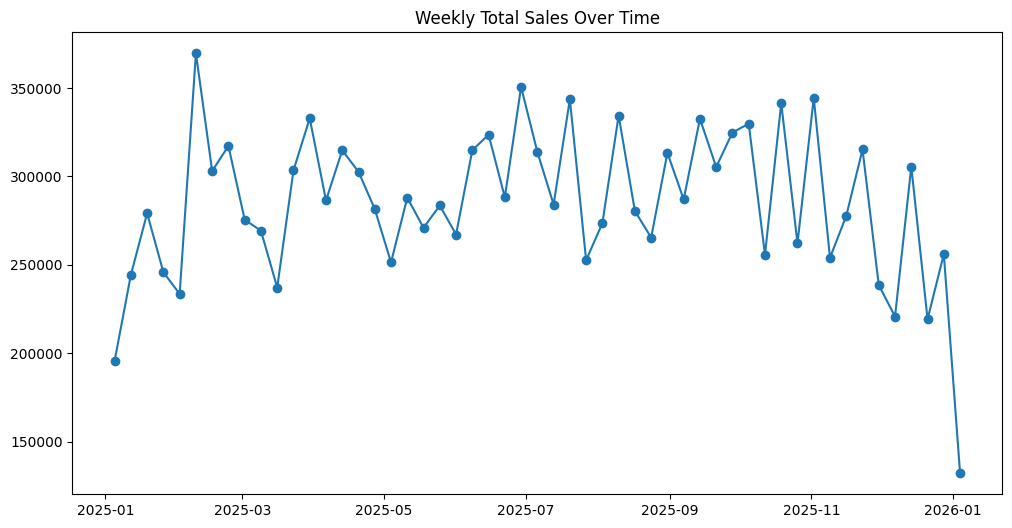

In [8]:
plt.figure(figsize=(12,6))
plt.plot(weekly_sales,marker='o')
plt.title('Weekly Total Sales Over Time')
plt.show()

In [9]:
customer_sales = df.groupby('customer_id')['Total_Sales'].sum().sort_values(ascending=False)

In [10]:
print(customer_sales.head(10))

customer_id
121    217972
157    197482
198    196620
130    183931
113    183157
138    180248
200    179539
156    177755
119    177452
102    176458
Name: Total_Sales, dtype: int64


In [11]:
cum_sales = customer_sales.cumsum()
cum_pct = 100 * cum_sales / customer_sales.sum()

In [ ]:
top_50_pct_count = len(cum_pct[cum_pct <= 50])
print(f'{top_50_pct_count} customer account for 50% of total revenue')